In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [53]:
df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [54]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4)
memory usage: 171.2 KB


In [55]:
wind_empty = (df['Wind'].isna()).sum()
wind_empty

1463

In [56]:
solar_empty = (df['Solar'].isna()).sum()
solar_empty
solar_wind_empty = (df['Wind+Solar'].isna()).sum()
solar_wind_empty
df_nan_percent = df.isna().sum()/df.isna().count()*100
df_nan_percent

Consumption     0.000000
Wind           33.378964
Solar          50.079854
Wind+Solar     50.102669
dtype: float64

In [57]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


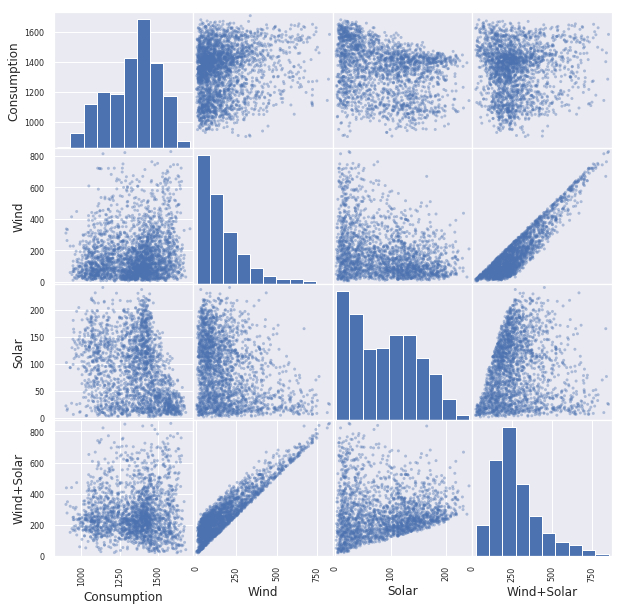

In [58]:
pd.plotting.scatter_matrix(df,alpha=0.4, figsize=(10,10))
plt.show()

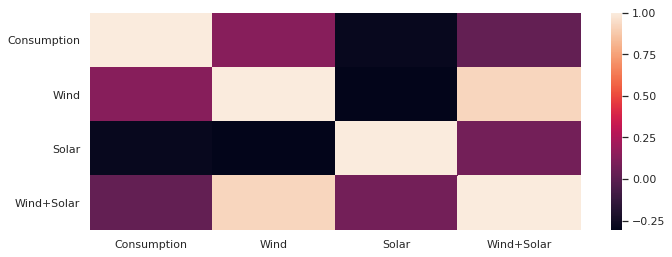

In [59]:
#Correlation Heat map between all variables
sns.heatmap(df.corr())

In [60]:
pd.to_datetime('2018-01-15 3:45pm')
pd.to_datetime('7/8/1952')
pd.to_datetime('7/8/1952', dayfirst=True)
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [61]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday_name
df.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [62]:
df.loc['2013-08-08']

Consumption     1291.98
Wind             79.666
Solar            93.371
Wind+Solar      173.037
Year               2013
Month                 8
Weekday        Thursday
Name: 2013-08-08 00:00:00, dtype: object

In [63]:
df.loc['2013-08-08':'2013-08-20']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2013-08-09,1254.462,19.564,89.341,108.905,2013,8,Friday
2013-08-10,1088.538,81.408,144.125,225.533,2013,8,Saturday
2013-08-11,990.552,99.216,140.225,239.441,2013,8,Sunday
2013-08-12,1264.423,94.114,133.530,227.644,2013,8,Monday
2013-08-13,1281.806,148.391,134.048,282.439,2013,8,Tuesday
2013-08-14,1270.136,110.763,147.257,258.020,2013,8,Wednesday
2013-08-15,1230.894,41.649,161.266,202.915,2013,8,Thursday
2013-08-16,1235.737,67.690,177.432,245.122,2013,8,Friday


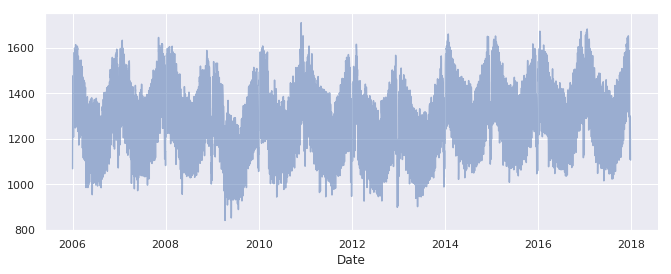

In [64]:
df.loc['2006'];
df.loc['2012-02'];
sns.set(rc={'figure.figsize':(11, 4)})
df['Consumption'].plot(alpha=0.5)
plt.show()

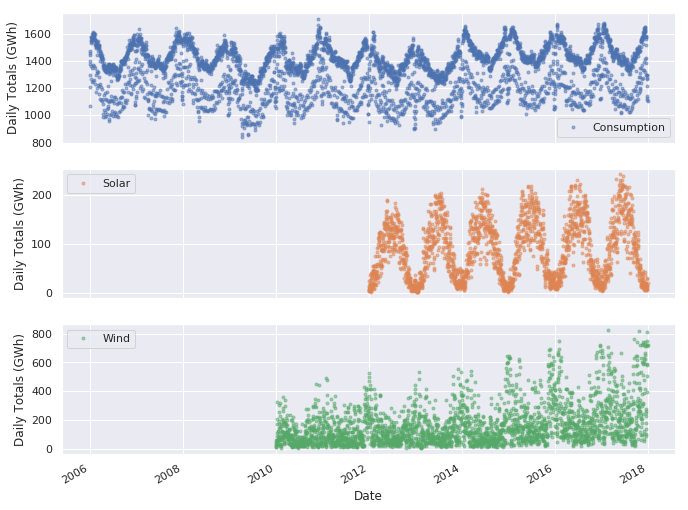

In [65]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

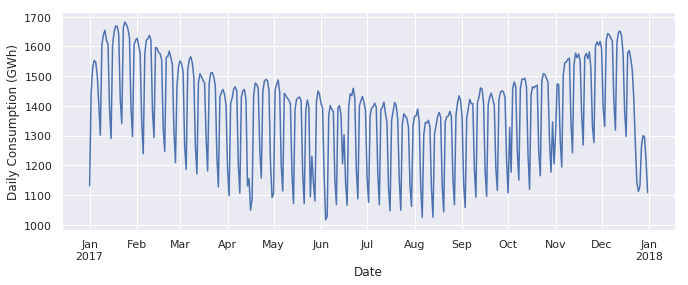

In [66]:
df.loc['2017','Consumption'].plot()
plt.ylabel('Daily Consumption (GWh)')
plt.show()

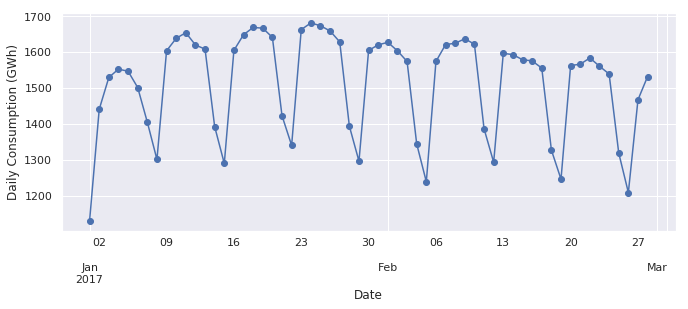

In [67]:
df.loc['2017-01':'2017-02','Consumption'].plot(marker='o',linestyle='-')
plt.ylabel('Daily Consumption (GWh)')
plt.show()

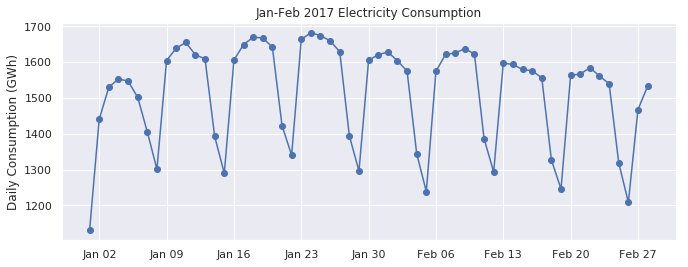

In [68]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

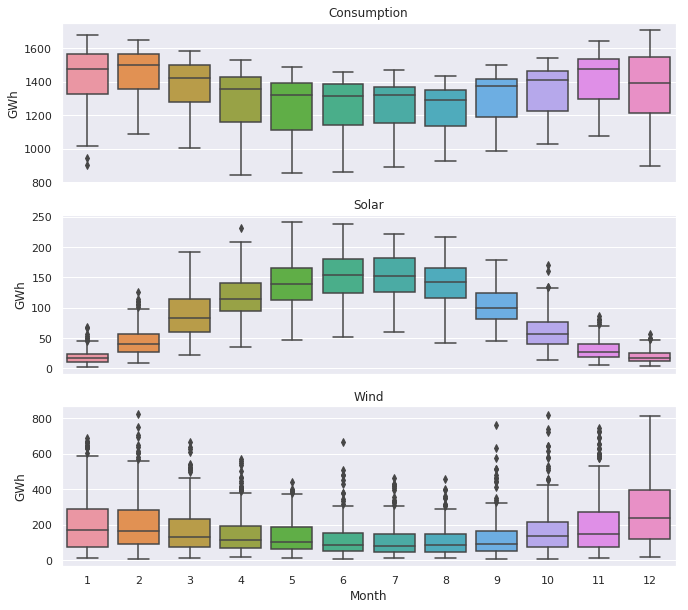

In [69]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(cols_plot, axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

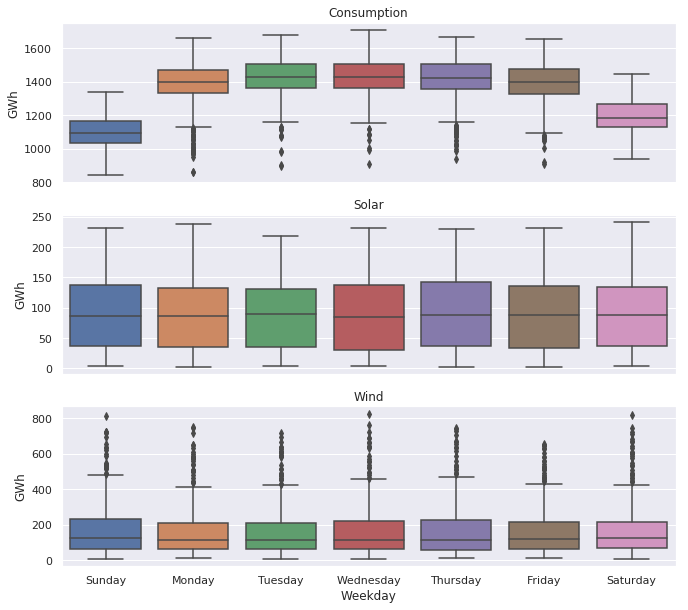

In [70]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(cols_plot, axes):
    sns.boxplot(data=df, x='Weekday', y=name, ax=ax);
    ax.set_ylabel('GWh')
    ax.set_title(name)

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

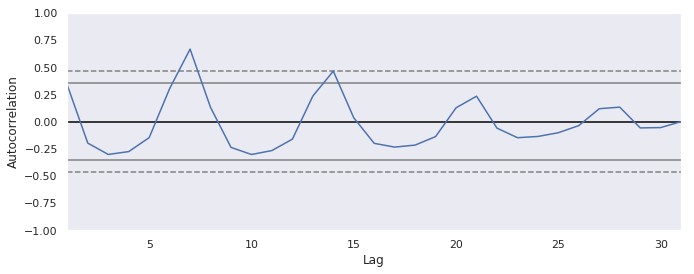

In [71]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.loc['2017-01','Consumption'])
plt.show()

In [72]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range('1998-03-10', '1998-03-31', freq='5D')

DatetimeIndex(['1998-03-10', '1998-03-15', '1998-03-20', '1998-03-25',
               '1998-03-30'],
              dtype='datetime64[ns]', freq='5D')

In [74]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [75]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [76]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = df.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [77]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')

# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [78]:
# Specify the data columns we want to include
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Resample to weekly frequency, aggregating with mean
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [79]:
print(df.shape[0])
print(df_weekly_mean.shape[0])

4383
627


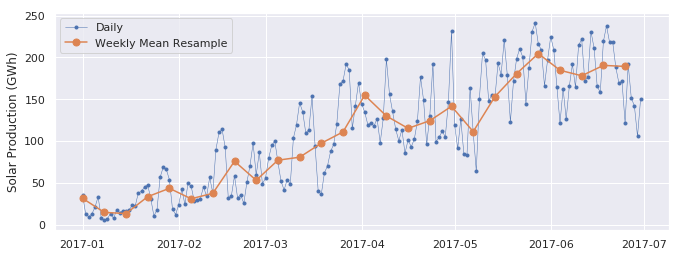

In [80]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=7, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [81]:
df_monthly = df[data_columns].resample('M').sum(min_count=28)
df_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


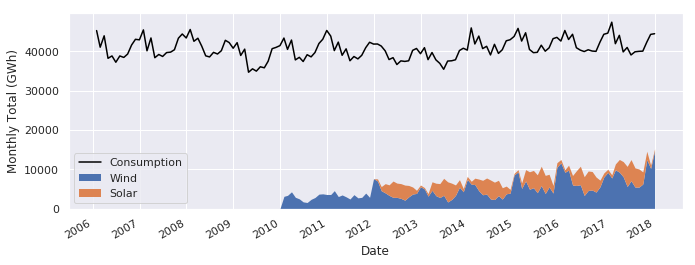

In [82]:
fig, ax = plt.subplots()
ax.plot(df_monthly['Consumption'], color='black', label='Consumption')
df_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

In [83]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
df_annual = df[data_columns].resample('A').sum(min_count=360)

# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
df_annual = df_annual.set_index(df_annual.index.year)
df_annual.index.name = 'Year'

# Compute the ratio of Wind+Solar to Consumption
df_annual['Wind+Solar/Consumption Ratio'] = df_annual['Wind+Solar'] / df_annual['Consumption']
df_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption Ratio
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


In [84]:
df_annual.sort_values(by=['Wind+Solar/Consumption Ratio'])

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption Ratio
Year,,,,,
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2017,504736.36939,102667.365,35882.643,138550.008,0.274500
2006,489068.53600,NaN,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN,NaN


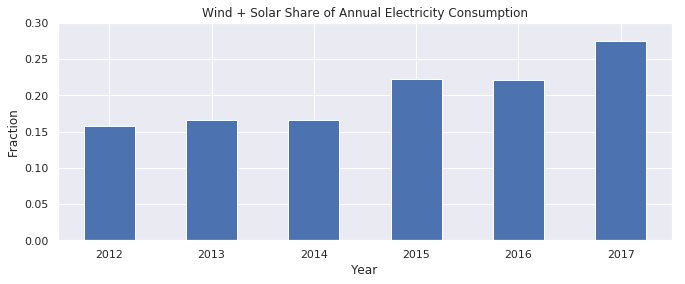

In [85]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = df_annual.loc[2012:, 'Wind+Solar/Consumption Ratio'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

In [86]:
# Compute the centered 7-day rolling mean
df_7d = df[data_columns].rolling(7, center=True).mean()
df_7d.head(12)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


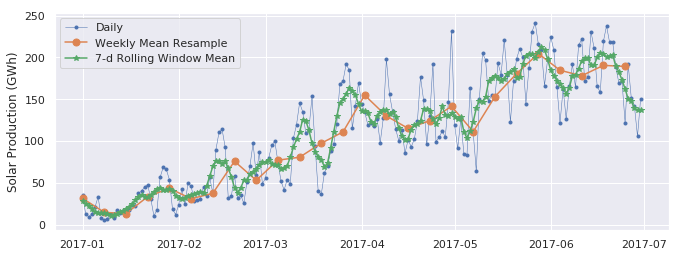

In [87]:
#Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=7, linestyle='-', label='Weekly Mean Resample')

ax.plot(df_7d.loc[start:end, 'Solar'],
marker='*', linestyle='-', label='7-d Rolling Window Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [88]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series

df_365d = df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

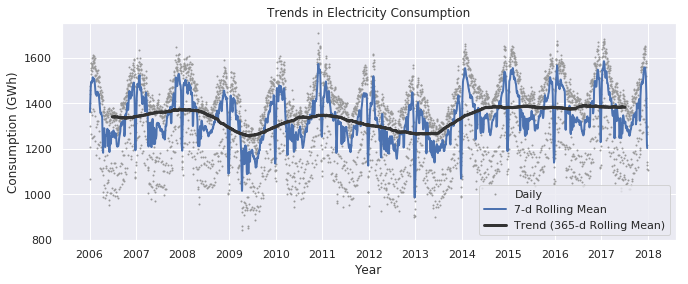

In [89]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(df['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')

ax.plot(df_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')

ax.plot(df_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

Text(0.5, 1.0, 'Trends in Electricity Production (365-d Rolling Means)')

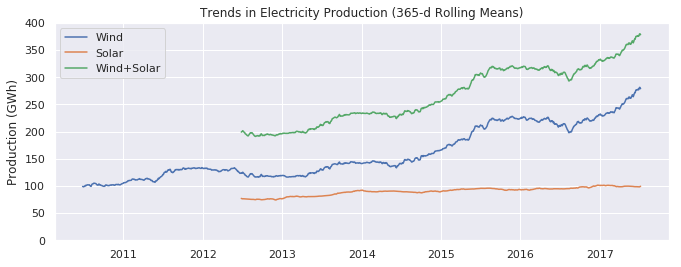

In [90]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(df_365d[nm], label=nm)

# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)')